In [1]:
import pandas as pd
from datetime import datetime 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cholera = pd.read_csv("https://raw.githubusercontent.com/IlerioDef/educational_data/main/kolera-katarina-1853.csv")

In [3]:
column_names = {
"Dödsdatum":"Date of death",
"Namn":"Name",
"Yrke":"Profession",
"Kön": "Sex",
"Ålder" : "Age",
"Församling" : "Data source",
"Arkivref" : "Archive ref",
"Sida" : "Page"} 
#Переименуем столбцы на английский манер. 
cholera.rename(columns=column_names, inplace = True)
#Изменим формат даты
cholera["Date of death"] = pd.to_datetime(cholera["Date of death"],format = "%Y-%m-%d")
cholera.info()



#ГРАФИК Х - столбиковая диаграмма с разбивкам по возрастным и половым группам. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date of death  545 non-null    datetime64[ns]
 1   Name           545 non-null    object        
 2   Profession     543 non-null    object        
 3   Sex            545 non-null    object        
 4   Age            542 non-null    float64       
 5   Data source    545 non-null    object        
 6   Archive ref    545 non-null    object        
 7   Page           545 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 34.2+ KB


<AxesSubplot:xlabel='Date of death'>

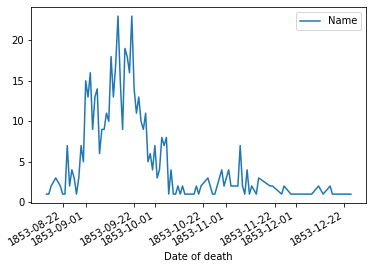

In [4]:
"""
График №1 - Линейная диаграмма. Она позволяет оценить, в какой именно 
период из рассматриваемого пришлось бОльшее количество смертей. Поскольку
холера относится к чрезвычайно быстро прогрессирующим (~ 48 часов) заболеваниям, мы можем
отследить пик заражения по смертям. Похоже, он приходится на 13 сентября - 01 октября 1953 года.

"""
death_rate = cholera[["Date of death","Name"]].groupby("Date of death").count()
death_rate.plot()

<AxesSubplot:title={'center':'распределение смертей по возрастам'}, ylabel='Frequency'>

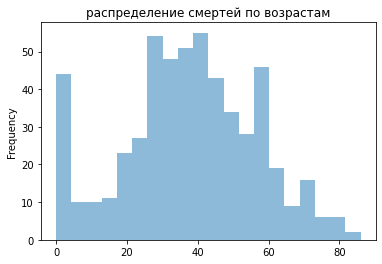

In [5]:
"""
ГРАФИК №2 - Гистограмма распределения по возрастам смерти.
Возникает вопрос, - на какой возраст приходится наибольшая смертность?
Гистограмма показывает, что наибольшее число смертей приходится на людей 25-40 лет. 
Это позволяет нам сделать предположение, что и с медициной, и с обеспеченностью
чистой водой в тот период в Швеции дела обстояли не лучшим образом. Также второй
пик приходится на наиболее трудоспособное (25-35 лет) население; возможно, это 
связано с родом деятельности? К сожадению, перевод со шведского даже гугл-переводчиком
не позволит сделать качественный анализ в разрезе профессий, - использованы обороты и 
сокращения, которые он не способен перевести. Отдельно заслуживает внимания пик 60-тилетних.
Возможно, эти люди находились на обеспечении членов своих семей и как и младенцы потребляли
ту же воду. Но вследствие ранней смертности в тот период их количество не соотносится с количеством
умерших детей?

"""
cholera["Age"].plot(kind="hist", title="распределение смертей по возрастам", bins=20,alpha=0.5)

<AxesSubplot:title={'center':'Распределение по полу'}, ylabel='Sex'>

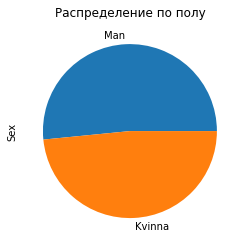

In [6]:
"""
ГРАФИК №3 - круговая диаграмма.
Имеется ли разница по полу среди погибших? Согласно полученной диаграмме, на мужчин приходится
большее количество смертей. С чем это может быть связано? Было ли изначально количество мужчин
большим, нежели женщин, проживающих на местности? Или это связано с их занятостью и возможностью
заразиться от контакта с водой?
"""
pie_data = cholera['Sex'].value_counts()
pie_data.plot(kind='pie', title='Распределение по полу')

<AxesSubplot:ylabel='Frequency'>

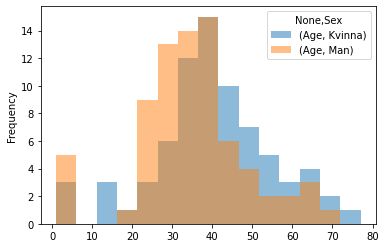

In [22]:
"""
ГРАФИК №4 - есть ли взаимосвязь между полом, возрастом и датой смертей? 
из получаемого графика можно предположить, что мужчины умирали чаще в более молодом возрасте, нежели женщины.
могло ли быть это связано с их родом деятельности? Или молодые женщины умирали от других причин 
в тот период чаще, например при родах?
"""
dead_by_sex = cholera.pivot_table(cholera,
                                  columns=cholera["Sex"],
                                  index=cholera["Date of death"],
                                  )
dead_by_sex.plot(kind="hist",bins=15,alpha=0.5)